<a href="https://colab.research.google.com/github/16Komang/project-big-data-2023/blob/main/tubesBigDataMachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
# Membaca file csv
df = pd.read_csv('/content/drive/MyDrive/Big data/death-rates-from-air-pollution.csv')

In [4]:
# Mengambil data hanya untuk daerah Indonesia
df = df[df['Entity'] == 'Indonesia']

In [5]:
# Menghapus kolom-kolom yang tidak dibutuhkan
df = df.drop(['Code'], axis=1)

In [6]:
# Mengganti nama kolom
df = df.rename(columns={
    'Year': 'Tahun',
    'Deaths - Cause: All causes - Risk: Household air pollution from solid fuels - Sex: Both - Age: Age-standardized (Rate)': 'Kematian_Household',
    'Deaths - Cause: All causes - Risk: Ambient particulate matter pollution - Sex: Both - Age: Age-standardized (Rate)': 'Kematian_ParticulateMatter',
    'Deaths - Cause: All causes - Risk: Air pollution - Sex: Both - Age: Age-standardized (Rate)': 'Kematian_AirPollution',
    'Deaths - Cause: All causes - Risk: Ambient ozone pollution - Sex: Both - Age: Age-standardized (Rate)': 'Kematian_Ozone'
})

In [7]:
# Mengurutkan data berdasarkan kolom-kolom akibat kematian dari terbesar ke terkecil
df = df.sort_values(by=['Kematian_Household', 'Kematian_ParticulateMatter', 'Kematian_AirPollution', 'Kematian_Ozone'], ascending=False)

# Mengatur ulang indeks data setelah diubah
df = df.reset_index(drop=True)

      Entity  Tahun  Kematian_Household  Kematian_ParticulateMatter  \
0  Indonesia   1990          125.715579                   37.313501   
1  Indonesia   1991          120.029598                   38.968971   
2  Indonesia   1992          114.813527                   40.539534   
3  Indonesia   1993          110.098325                   41.984926   
4  Indonesia   1994          105.567070                   43.074386   

   Kematian_AirPollution  Kematian_Ozone  
0             163.323136        0.560691  
1             159.293964        0.609826  
2             155.612163        0.629601  
3             152.489308        0.938119  
4             149.043526        0.879339  


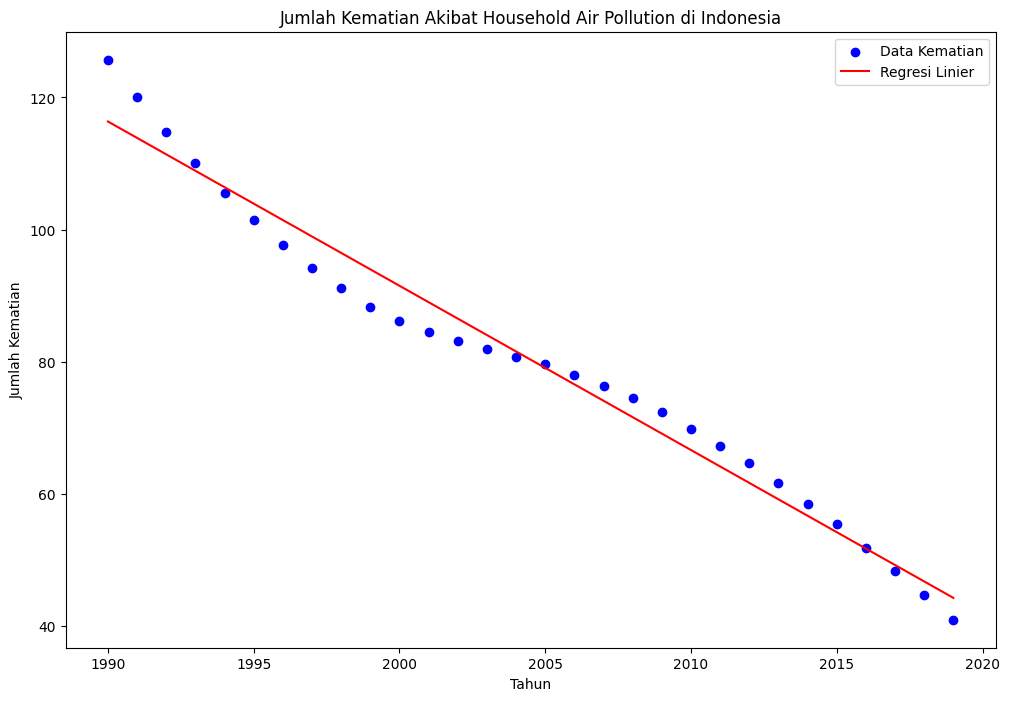

In [15]:
# Menampilkan lima data pertama
print(df.head())

# Split data menjadi fitur (X) dan target (Y)
X = df['Tahun'].values.reshape(-1, 1)
Y = df['Kematian_Household'].values

# Membuat model regresi linier
model = LinearRegression()

# Melakukan training model
model.fit(X, Y)

# Melakukan prediksi jumlah kematian untuk tahun tertentu
tahun_prediksi = 2024
jumlah_kematian_prediksi = model.predict([[tahun_prediksi]])

# Membuat grafik jumlah kematian per tahun
plt.figure(figsize=(12, 8))
plt.scatter(df['Tahun'], df['Kematian_Household'], color='blue', label='Data Kematian')
plt.plot(df['Tahun'], model.predict(X), color='red', label='Regresi Linier')
plt.title('Jumlah Kematian Akibat Household Air Pollution di Indonesia')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kematian')
plt.legend()
plt.show()
plt.show()

In [16]:
# Menampilkan hasil prediksi
print(df.head(5))
print("Prediksi jumlah kematian akibat Household Air Pollution di Indonesia pada tahun", tahun_prediksi, "adalah", jumlah_kematian_prediksi)

      Entity  Tahun  Kematian_Household  Kematian_ParticulateMatter  \
0  Indonesia   1990          125.715579                   37.313501   
1  Indonesia   1991          120.029598                   38.968971   
2  Indonesia   1992          114.813527                   40.539534   
3  Indonesia   1993          110.098325                   41.984926   
4  Indonesia   1994          105.567070                   43.074386   

   Kematian_AirPollution  Kematian_Ozone  
0             163.323136        0.560691  
1             159.293964        0.609826  
2             155.612163        0.629601  
3             152.489308        0.938119  
4             149.043526        0.879339  
Prediksi jumlah kematian akibat Household Air Pollution di Indonesia pada tahun 2024 adalah [31.82461135]
